# Scikit-learn

In [115]:
import pandas as pd
import numpy as np
import matplotlib as mpl #rarely use mpl directly
import matplotlib.pyplot as plt #rather using pyplot more
import seaborn as sns

In [6]:
url = "https://raw.githubusercontent.com/jennyonjourney/jupyter-demo/main/daag_books.csv"
books = pd.read_csv(url, index_col=0)
print(books.head(5))

   volume  area  weight cover
1     885   382     800    hb
2    1016   468     950    hb
3    1125   387    1050    hb
4     239   371     350    hb
5     701   371     750    hb


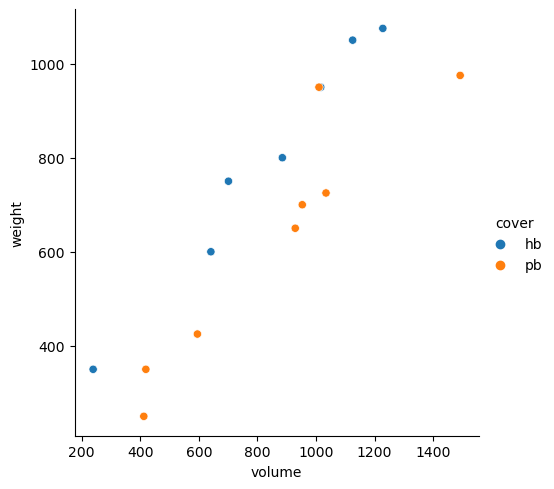

In [10]:
sns.relplot(data=books, x="volume",y="weight",hue="cover")

## Linear regression

In [11]:
from sklearn.linear_model import LinearRegression

In [20]:
# input : np array (2d)
lm = LinearRegression()
m = lm.fit(
    X = books[["volume"]], #np.arrage(books.volume) won't work!!!
    y = books.weight
)
m.coef_ ; lm_coef_ # lm and m are labels for the same object

array([0.70863714])

In [15]:
m.intercept_ ; lm.intercept_

107.679310613766

In [23]:
lm.fit(
    X = np.array(books.volume).reshape(-1,1),
    y = books.weight
)

LinearRegression()

In [24]:
lm.get_params()
# lm.set_params(fit_intercept = False) then intercept is not shown

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [25]:
lm.predict(X=books[["volume"]])

/Users/kyungeunjeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 734.8231825 ,  827.65464828,  904.89609691,  277.04358788,
        604.43394812,  561.91571951,  977.88572267,  399.63781368,
        783.01050825,  766.0032168 , 1164.96592852,  404.59827369,
        823.40282542,  529.31841092,  840.41011686])

In [26]:
books["weight_lm_pred"] = lm.predict(X=books[["volume"]])
books

/Users/kyungeunjeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,volume,area,weight,cover,weight_lm_pred
1,885,382,800,hb,734.823182
2,1016,468,950,hb,827.654648
3,1125,387,1050,hb,904.896097
4,239,371,350,hb,277.043588
5,701,371,750,hb,604.433948
6,641,367,600,hb,561.915720
7,1228,396,1075,hb,977.885723
8,412,0,250,pb,399.637814
9,953,0,700,pb,783.010508
10,929,0,650,pb,766.003217


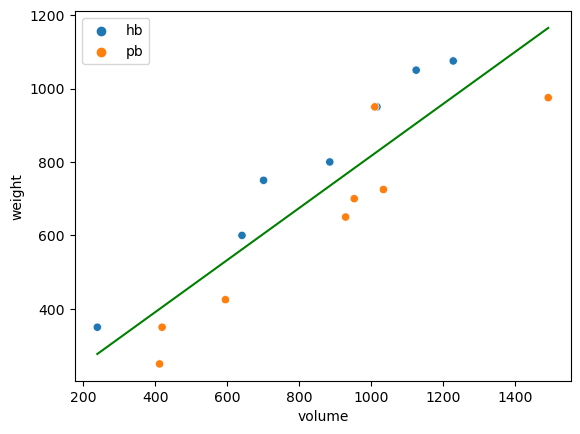

In [27]:
plt.figure()
sns.scatterplot(data=books, x="volume", y="weight", hue="cover")
sns.lineplot(data=books, x="volume", y="weight_lm_pred", color="green")
plt.show()

### Residuals

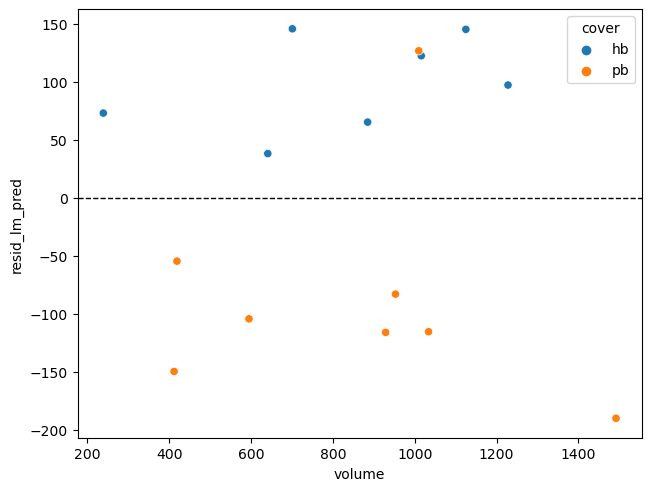

In [28]:
# get the diff (residuals)
books["resid_lm_pred"] = books["weight"] - books["weight_lm_pred"]

# empty figure
plt.figure(layout="constrained")
# ax graph for plotting and line
ax = sns.scatterplot(data=books, x="volume", y="resid_lm_pred", hue="cover")
ax.axhline(c="k", ls="--", lw=1)
plt.show()

In [29]:
# categorical variables
lm = lm.fit(
  X = books[["volume", "cover"]],
  y = books.weight
)

ValueError: could not convert string to float: 'hb'

In [32]:
pd.get_dummies(books[["cover"]])

,cover_hb,cover_pb
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,0,1
10,0,1


In [33]:
pd.get_dummies(books[["volume","cover"]]) #one-hot encoding
# drop first column : https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707
pd.get_dummies(books[["volume","cover"]],drop_first = True)

,volume,cover_pb
1,885,0
2,1016,0
3,1125,0
4,239,0
5,701,0
6,641,0
7,1228,0
8,412,1
9,953,1
10,929,1


In [34]:
lm = LinearRegression().fit(
  X = pd.get_dummies(books[["volume", "cover"]]),
  y = books.weight
)

lm.intercept_
lm.coef_

array([  0.71795374,  92.02363569, -92.02363569])

In [35]:
lm = LinearRegression().fit(
  X = pd.get_dummies(books[["volume", "cover"]],drop_first = True),
  y = books.weight
)

lm.intercept_
lm.coef_

array([   0.71795374, -184.04727138])

In [37]:
# Comparing it with R
# d = read.csv('data/daag_books.csv')
# d['cover_hb'] = ifelse(d$cover == "hb", 1, 0)
# d['cover_pb'] = ifelse(d$cover == "pb", 1, 0)
# (lm = lm(weight~volume+cover_hb+cover_pb, data=d))
# summary(lm)

array([   0.71795374, -184.04727138])

In [39]:
# fit_intercept is what for? the data should be centered. & Avoiding co-linearity
lm = LinearRegression(fit_intercept = False).fit(
  X = pd.get_dummies(books[["volume", "cover"]],drop_first=True),
  y = books.weight
)

lm.intercept_
lm.coef_
lm.feature_names_in_

array(['volume', 'cover_pb'], dtype=object)

### Preprocessors

In [40]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit(X = books[["cover"]])
enc.transform(X = books[["cover"]])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [41]:
enc = OneHotEncoder(sparse=False, drop="first")
enc.fit_transform(X = books[["cover"]])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [42]:
enc.get_feature_names_out()

array(['cover_pb'], dtype=object)

In [43]:
# inverse (undo) transform
f = enc.transform(X = books[["cover"]])
enc.inverse_transform(f)

array([['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb']], dtype=object)

In [45]:
enc = OneHotEncoder(sparse=False)
X = enc.fit_transform(
  X = books[["volume", "cover"]]
)

pd.DataFrame(
  data=X,
  columns = enc.get_feature_names_out()
)
# columna name is changed!!! not that facncy then get_dummies() 
# => need to use it only for categorical data

,volume_239,volume_412,volume_419,volume_595,volume_641,volume_701,volume_885,volume_929,volume_953,volume_1010,volume_1016,volume_1034,volume_1125,volume_1228,volume_1492,cover_hb,cover_pb
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
cover = OneHotEncoder(
  sparse=False
).fit_transform(
  books[["cover"]]
) # full one-hot encoding

X = np.c_[books.volume, cover]
X

array([[8.850e+02, 1.000e+00, 0.000e+00],
       [1.016e+03, 1.000e+00, 0.000e+00],
       [1.125e+03, 1.000e+00, 0.000e+00],
       [2.390e+02, 1.000e+00, 0.000e+00],
       [7.010e+02, 1.000e+00, 0.000e+00],
       [6.410e+02, 1.000e+00, 0.000e+00],
       [1.228e+03, 1.000e+00, 0.000e+00],
       [4.120e+02, 0.000e+00, 1.000e+00],
       [9.530e+02, 0.000e+00, 1.000e+00],
       [9.290e+02, 0.000e+00, 1.000e+00],
       [1.492e+03, 0.000e+00, 1.000e+00],
       [4.190e+02, 0.000e+00, 1.000e+00],
       [1.010e+03, 0.000e+00, 1.000e+00],
       [5.950e+02, 0.000e+00, 1.000e+00],
       [1.034e+03, 0.000e+00, 1.000e+00]])

In [47]:
lm2 = LinearRegression(fit_intercept=False).fit(
  X = X,
  y = books.weight
)

lm2.coef_

array([  0.71795374, 197.96284357,  13.91557219])

In [49]:
books["weight_lm2_pred"] = lm2.predict(X=X)
books

,volume,area,weight,cover,weight_lm_pred,resid_lm_pred,weight_lm2_pred
1,885,382,800,hb,734.823182,65.176818,833.351907
2,1016,468,950,hb,827.654648,122.345352,927.403847
3,1125,387,1050,hb,904.896097,145.103903,1005.660805
4,239,371,350,hb,277.043588,72.956412,369.553788
5,701,371,750,hb,604.433948,145.566052,701.248418
6,641,367,600,hb,561.915720,38.084280,658.171193
7,1228,396,1075,hb,977.885723,97.114277,1079.610041
8,412,0,250,pb,399.637814,-149.637814,309.712515
9,953,0,700,pb,783.010508,-83.010508,698.125490
10,929,0,650,pb,766.003217,-116.003217,680.894600


In [50]:
books.drop(["weight_lm_pred", "resid_lm_pred"], axis=1)

,volume,area,weight,cover,weight_lm2_pred
1,885,382,800,hb,833.351907
2,1016,468,950,hb,927.403847
3,1125,387,1050,hb,1005.660805
4,239,371,350,hb,369.553788
5,701,371,750,hb,701.248418
6,641,367,600,hb,658.171193
7,1228,396,1075,hb,1079.610041
8,412,0,250,pb,309.712515
9,953,0,700,pb,698.125490
10,929,0,650,pb,680.894600


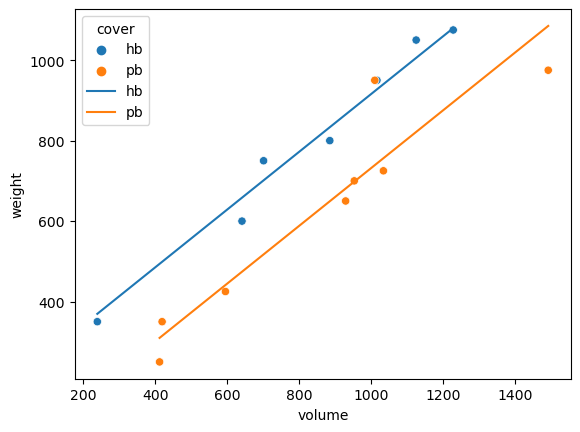

In [52]:
plt.figure()
sns.scatterplot(data=books, x="volume", y="weight", hue="cover")
sns.lineplot(data=books, x="volume", y="weight_lm2_pred", hue="cover")
plt.show()

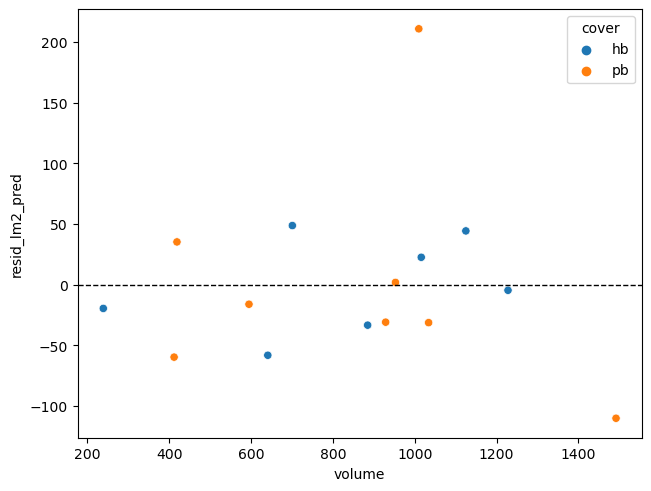

In [53]:
books["resid_lm2_pred"] = books["weight"] - books["weight_lm2_pred"]

plt.figure(layout="constrained")
ax = sns.scatterplot(data=books, x="volume", y="resid_lm2_pred", hue="cover")
ax.axhline(c="k", ls="--", lw=1)
plt.show()

## Model performance

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
r2_score(books.weight, books.weight_lm_pred)
mean_squared_error(books.weight, books.weight_lm_pred) # MSE
mean_squared_error(books.weight, books.weight_lm_pred, squared=False) # RMSE

115.38368348993234

In [57]:
r2_score(books.weight, books.weight_lm2_pred)
mean_squared_error(books.weight, books.weight_lm2_pred) # MSE
mean_squared_error(books.weight, books.weight_lm2_pred, squared=False) # RMSE

69.94312276839727

### Excercise 1

In [62]:
books = pd.read_csv(url, index_col=0)
cover = pd.get_dummies(books[["cover"]],drop_first=True)

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: cover_pb, dtype: uint8

In [63]:
X = np.c_[
    books.volume,
    cover.cover_pb,
    cover.cover_pb * books.volume
]
X

array([[ 885,    0,    0],
       [1016,    0,    0],
       [1125,    0,    0],
       [ 239,    0,    0],
       [ 701,    0,    0],
       [ 641,    0,    0],
       [1228,    0,    0],
       [ 412,    1,  412],
       [ 953,    1,  953],
       [ 929,    1,  929],
       [1492,    1, 1492],
       [ 419,    1,  419],
       [1010,    1, 1010],
       [ 595,    1,  595],
       [1034,    1, 1034]])

In [64]:
lm = LinearRegression().fit(X=X, y=books.weight)

In [65]:
(lm.intercept_,
lm.coef_)

(161.5865414110442, array([ 7.61592838e-01, -1.20214066e+02, -7.57336630e-02]))

## Polynomial regression

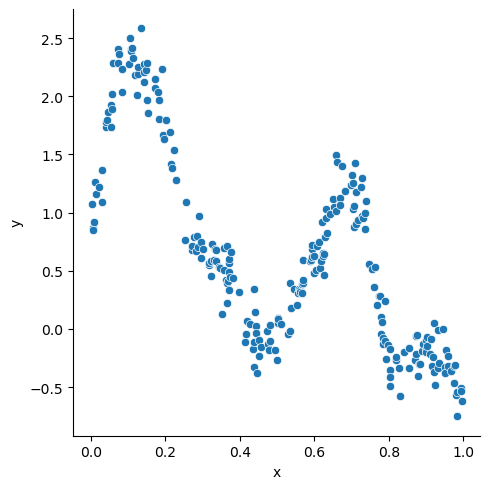

In [70]:
%matplotlib inline
df = pd.read_csv("https://raw.github.com/Sta663-Sp22/sta663-sp22.github.io/master/slides/data/gp.csv")
sns.relplot(data=df, x="x", y="y")

In [72]:
X = np.c_[
    np.ones(df.shape[0]),
    df.x,
    df.x**2,
    df.x**3
]

plm = LinearRegression(fit_intercept = False).fit(X=X, y=df.y)

plm.coef_

array([ 2.36985684, -8.49429068, 13.95066369, -8.39215284])

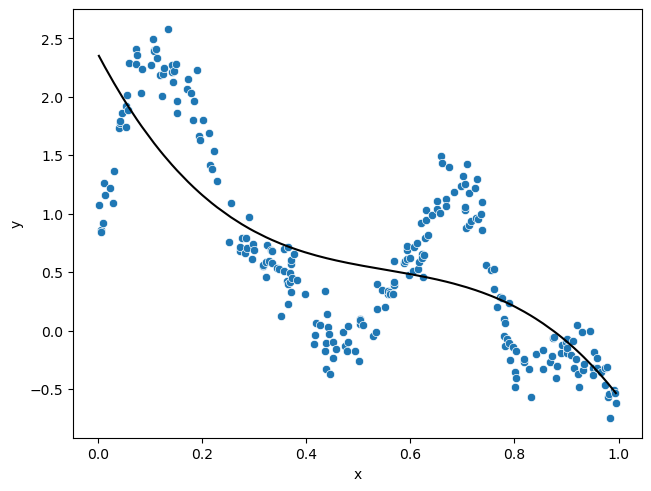

In [73]:
df["y_pred"] = plm.predict(X=X)
plt.figure(layout="constrained")
sns.scatterplot(data=df, x="x", y="y")
sns.lineplot(data=df, x="x", y="y_pred", color="k")
plt.show()

In [74]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array(range(6)).reshape(-1,1)
pf = PolynomialFeatures(degree=3)
pf.fit(X)
pf.transform(X)
pf.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [75]:
X.reshape(-1, 2)

pf = PolynomialFeatures(degree=3, include_bias=False)
pf.fit_transform(X.reshape(-1, 2))
pf.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [77]:
def poly_model(X, y, degree):
    X  = PolynomialFeatures(
        degree=degree, include_bias=False
        ).fit_transform(X=X)
    y_pred = LinearRegression().fit(X=X, y=y).predict(X)
    return mean_squared_error(y, y_pred, squared=False)

poly_model(X = df[["x"]], y = df.y, degree = 2)
poly_model(X = df[["x"]], y = df.y, degree = 3)

0.5208157900621084

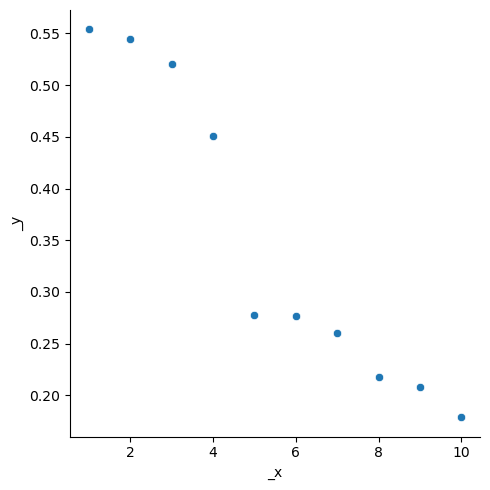

In [78]:
degrees = range(1,11)
rmses = [poly_model(X=df[["x"]], y=df.y, degree=d) 
         for d in degrees]
sns.relplot(x=degrees, y=rmses)

## Pipelines

In [79]:
# https://zephyrus1111.tistory.com/254

from sklearn.pipeline import make_pipeline

p = make_pipeline(
    PolynomialFeatures(degree=4),
    LinearRegression()
)

p

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [84]:
p = p.fit(X = df[["x"]], y = df.y)
p

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

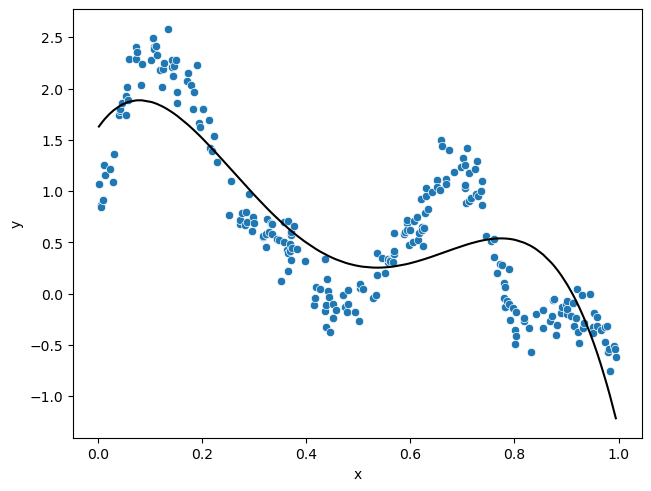

In [85]:
p.predict(X = df[["x"]])
plt.figure(layout="constrained")
sns.scatterplot(data=df, x="x", y="y")
sns.lineplot(x=df.x, y=p.predict(X = df[["x"]]), color="k")
plt.show()

In [86]:
p.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [87]:
p.named_steps["linearregression"].intercept_
p.steps[1][1].coef_
p.steps

[('polynomialfeatures', PolynomialFeatures(degree=4)),
 ('linearregression', LinearRegression())]

In [88]:
p.steps[0][1].get_feature_names_out()

array(['1', 'x', 'x^2', 'x^3', 'x^4'], dtype=object)

In [90]:
p.named_steps["linearregression"].get_params()
p.named_steps["linearregression"].set_params(fit_intercept=False)
p.fit(X = df[["x"]], y = df.y)
p.named_steps["linearregression"].intercept_
p.named_steps["linearregression"].coef_

array([  1.61366366,   7.39051417, -57.67175293, 102.72227443,
       -55.38181361])

### Tuning parameter

In [91]:
# built in automated tuning
from sklearn.model_selection import GridSearchCV, KFold

p = make_pipeline(
    PolynomialFeatures(include_bias=True),
    LinearRegression(fit_intercept=False)
)

grid_search = GridSearchCV(
  estimator = p, 
  param_grid = {"polynomialfeatures__degree": range(1,11)},
  scoring = "neg_root_mean_squared_error",
  cv = KFold(shuffle=True)
)

grid_search

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'polynomialfeatures__degree': range(1, 11)},
             scoring='neg_root_mean_squared_error')

# Scikit-learn : Cross-validation & hyper parameter tuning

In [92]:
# column transformer for easy pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = make_column_transformer(
  (StandardScaler(), ["volume"]),
  (OneHotEncoder(), ["cover"]),
).fit(
  books
)
ct.get_feature_names_out()
ct.transform(books)

array([[ 0.12100717,  1.        ,  0.        ],
       [ 0.51996539,  1.        ,  0.        ],
       [ 0.85192299,  1.        ,  0.        ],
       [-1.84637457,  1.        ,  0.        ],
       [-0.43936162,  1.        ,  0.        ],
       [-0.62209057,  1.        ,  0.        ],
       [ 1.1656077 ,  1.        ,  0.        ],
       [-1.31950608,  0.        ,  1.        ],
       [ 0.32809999,  0.        ,  1.        ],
       [ 0.25500841,  0.        ,  1.        ],
       [ 1.9696151 ,  0.        ,  1.        ],
       [-1.2981877 ,  0.        ,  1.        ],
       [ 0.5016925 ,  0.        ,  1.        ],
       [-0.76218277,  0.        ,  1.        ],
       [ 0.57478408,  0.        ,  1.        ]])

In [ ]:
# drop not necessary columns
ct = make_column_transformer(
  (StandardScaler(), ["volume"]),
  (OneHotEncoder(), ["cover"]),
  remainder = "passthrough"
).fit(
  books
)

In [93]:
# column selection
from sklearn.compose import make_column_selector
ct = make_column_transformer(
  ( StandardScaler(), 
    make_column_selector(dtype_include=np.number)),
  ( OneHotEncoder(), 
    make_column_selector(dtype_include=[object, bool]))
)

ct.fit_transform(books)

array([[ 0.12100717,  1.01279431,  0.35935849,  1.        ,  0.        ],
       [ 0.51996539,  1.45004486,  0.93689893,  1.        ,  0.        ],
       [ 0.85192299,  1.03821585,  1.32192589,  1.        ,  0.        ],
       [-1.84637457,  0.95686691, -1.37326282,  1.        ,  0.        ],
       [-0.43936162,  0.95686691,  0.16684502,  1.        ,  0.        ],
       [-0.62209057,  0.93652968, -0.41069542,  1.        ,  0.        ],
       [ 1.1656077 ,  1.08397463,  1.41818263,  1.        ,  0.        ],
       [-1.31950608, -0.92941164, -1.75828978,  0.        ,  1.        ],
       [ 0.32809999, -0.92941164, -0.02566846,  0.        ,  1.        ],
       [ 0.25500841, -0.92941164, -0.21818194,  0.        ,  1.        ],
       [ 1.9696151 , -0.92941164,  1.03315567,  0.        ,  1.        ],
       [-1.2981877 , -0.92941164, -1.37326282,  0.        ,  1.        ],
       [ 0.5016925 , -0.92941164,  0.93689893,  0.        ,  1.        ],
       [-0.76218277, -0.92941164, -1.0

### hw2 ridge regression data

In [95]:
d = pd.read_csv("https://raw.github.com/Sta663-Sp22/sta663-sp22.github.io/master/slides/data/ridge.csv")
d

,y,x1,x2,x3,x4,x5
0,-0.151710,0.353658,1.633932,0.553257,1.415731,A
1,3.579895,1.311354,1.457500,0.072879,0.330330,B
2,0.768329,-0.744034,0.710362,-0.246941,0.008825,B
3,7.788646,0.806624,-0.228695,0.408348,-2.481624,B
4,1.394327,0.837430,-1.091535,-0.860979,-0.810492,A
...,...,...,...,...,...,...
495,-0.204932,-0.385814,-0.130371,-0.046242,0.004914,A
496,0.541988,0.845885,0.045291,0.171596,0.332869,A
497,-1.402627,-1.071672,-1.716487,-0.319496,-1.163740,C
498,-0.043645,1.744800,-0.010161,0.422594,0.772606,A


In [96]:
d = pd.get_dummies(d)
d

,y,x1,x2,x3,x4,x5_A,x5_B,x5_C,x5_D
0,-0.151710,0.353658,1.633932,0.553257,1.415731,1,0,0,0
1,3.579895,1.311354,1.457500,0.072879,0.330330,0,1,0,0
2,0.768329,-0.744034,0.710362,-0.246941,0.008825,0,1,0,0
3,7.788646,0.806624,-0.228695,0.408348,-2.481624,0,1,0,0
4,1.394327,0.837430,-1.091535,-0.860979,-0.810492,1,0,0,0
...,...,...,...,...,...,...,...,...,...
495,-0.204932,-0.385814,-0.130371,-0.046242,0.004914,1,0,0,0
496,0.541988,0.845885,0.045291,0.171596,0.332869,1,0,0,0
497,-1.402627,-1.071672,-1.716487,-0.319496,-1.163740,0,0,1,0
498,-0.043645,1.744800,-0.010161,0.422594,0.772606,1,0,0,0


## Ridge regression 

In [98]:
from sklearn.linear_model import Ridge, LinearRegression
X, y = d.drop(["y"], axis=1), d.y #X is the d table after removing independent variable
rg = Ridge(fit_intercept=False, alpha=10).fit(X,y)
lm = LinearRegression(fit_intercept=False).fit(X,y)
print("rg coef: ", rg.coef_)
print("lm coef: ", lm.coef_)

rg coef:  [ 9.78094427e-01  1.96214789e+00  1.72468416e-03 -2.94457278e+00
  4.55579498e-01  9.00081205e-02 -2.81934999e-01  7.97808337e-01]
lm coef:  [ 9.95049976e-01  2.00761962e+00  2.31665882e-03 -3.00088386e+00
  4.93293037e-01  1.01926957e-01 -2.94125938e-01  1.00855936e+00]


In [100]:
print(mean_squared_error(y, rg.predict(X)))
print(mean_squared_error(y, lm.predict(X)))

0.019101431349883527
0.009872435924102052


## Test-Train split

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [103]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(500, 8)
(400, 8)
(100, 8)
(500,)
(400,)
(100,)


In [104]:
alpha = np.logspace(-2,1, 100)
train_rmse = []
test_rmse = []

for a in alpha:
    rg = Ridge(alpha=a).fit(X_train, y_train)
    
    train_rmse.append( 
      mean_squared_error(y_train, rg.predict(X_train), squared=False) 
    )
    test_rmse.append( 
      mean_squared_error(y_test, rg.predict(X_test), squared=False) 
    )

res = pd.DataFrame(data = {"alpha": alpha, "train_rmse": train_rmse, "test_rmse": test_rmse})
res

,alpha,train_rmse,test_rmse
0,0.010000,0.097568,0.106985
1,0.010723,0.097568,0.106984
2,0.011498,0.097568,0.106984
3,0.012328,0.097568,0.106983
4,0.013219,0.097568,0.106983
...,...,...,...
95,7.564633,0.126990,0.129414
96,8.111308,0.130591,0.132458
97,8.697490,0.134568,0.135838
98,9.326033,0.138950,0.139581


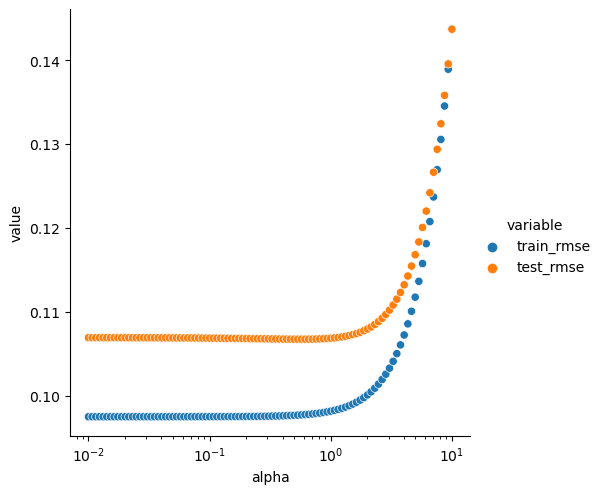

In [105]:
g = sns.relplot(x="alpha", y="value", hue="variable", data = pd.melt(res, id_vars=["alpha"]))
g.set(xscale="log")
# find the minimum value in test_rmse (orange)

In [106]:
min_i = np.argmin(res.train_rmse)
min_i

res.iloc[[min_i],:]

,alpha,train_rmse,test_rmse
0,0.01,0.097568,0.106985


In [107]:
min_i = np.argmin(res.test_rmse)
min_i

res.iloc[[min_i],:]

,alpha,train_rmse,test_rmse
58,0.572237,0.097787,0.1068


## k-fold validation

In [108]:
from sklearn.model_selection import cross_val_score
# score : negative mse = inverse concept of mean squared error
cross_val_score(
  Ridge(alpha=0.59, fit_intercept=False), 
  X, y, 
  cv=5, 
  scoring="neg_root_mean_squared_error"
)

array([-0.09363885, -0.09995222, -0.1047411 , -0.10272958, -0.10596871])

In [109]:
ex = pd.DataFrame(data = list(range(10)), columns=["x"])

cv = KFold(5)
for train, test in cv.split(ex):
    print(f'Train: {train} | test: {test}')

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


In [111]:
v = KFold(5, shuffle=True, random_state=1234)
for train, test in cv.split(ex):
    print(f'Train: {train} | test: {test}')

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


In [112]:
alpha = np.logspace(-2,1, 30)
test_mean_rmse = []
test_rmse = []
cv = KFold(n_splits=5, shuffle=True, random_state=1234)

for a in alpha:
    rg = Ridge(fit_intercept=False, alpha=a).fit(X_train, y_train)
    
    scores = -1 * cross_val_score(
      rg, X, y, 
      cv = cv, 
      scoring="neg_root_mean_squared_error"
    )
    test_mean_rmse.append(np.mean(scores))
    test_rmse.append(scores)

res = pd.DataFrame(
    data = np.c_[alpha, test_mean_rmse, test_rmse],
    columns = ["alpha", "mean_rmse"] + ["fold" + str(i) for i in range(1,6) ]
)
res

,alpha,mean_rmse,fold1,fold2,fold3,fold4,fold5
0,0.010000,0.101257,0.106979,0.103691,0.102288,0.101130,0.092195
1,0.012690,0.101257,0.106976,0.103692,0.102292,0.101129,0.092194
2,0.016103,0.101256,0.106971,0.103692,0.102298,0.101126,0.092194
3,0.020434,0.101256,0.106966,0.103693,0.102306,0.101123,0.092193
4,0.025929,0.101256,0.106959,0.103694,0.102316,0.101120,0.092191
5,0.032903,0.101256,0.106951,0.103696,0.102328,0.101116,0.092190
6,0.041753,0.101256,0.106940,0.103698,0.102344,0.101110,0.092188
7,0.052983,0.101256,0.106927,0.103701,0.102365,0.101104,0.092186
8,0.067234,0.101257,0.106911,0.103704,0.102391,0.101096,0.092184
9,0.085317,0.101259,0.106890,0.103709,0.102426,0.101088,0.092181


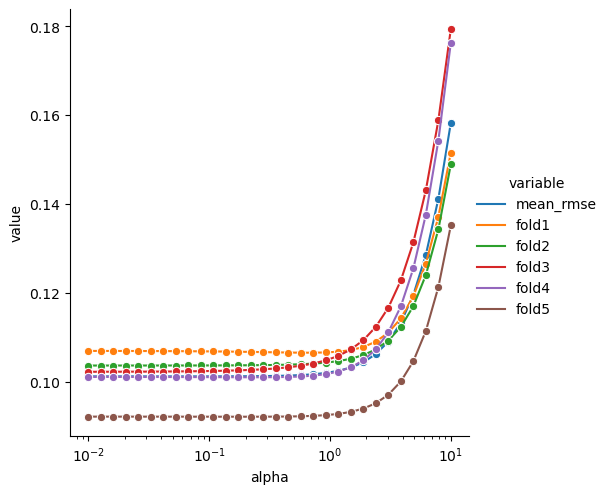

In [113]:
g = sns.relplot(x="alpha", y="value", hue="variable", data=res.melt(id_vars=["alpha"]), marker="o", kind="line")
g.set(xscale="log")

In [ ]:
i = res.drop(
  ["alpha"], axis=1
).agg(
  np.argmin
).to_numpy()

i = np.sort(np.unique(i))

res.iloc[ i, : ]

In [114]:
np.array( sorted(
  sklearn.metrics.SCORERS.keys()
) )

NameError: name 'sklearn' is not defined

In [117]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
  Ridge(fit_intercept=False),
  {"alpha": np.logspace(-2, 1, 30)},
  cv = KFold(5, shuffle=True, random_state=1234),
  scoring = "neg_root_mean_squared_error"
).fit(
  X, y
)

In [119]:
gs.best_index_
gs.best_params_
gs.best_score_
gs.best_estimator_
gs.best_estimator_.coef_
#gs.best_estimator_.predict(X)

array([ 9.94994054e-01,  2.00746835e+00,  2.31191242e-03, -3.00069733e+00,
        4.93160501e-01,  1.01885074e-01, -2.94083502e-01,  1.00766853e+00])

In [120]:
gs.cv_results_.keys()
gs.cv_results_["param_alpha"]
gs.cv_results_["mean_test_score"]
gs.cv_results_["mean_fit_time"]

array([0.00216022, 0.00202088, 0.00143876, 0.00151763, 0.00133801,
       0.00158725, 0.00153713, 0.00128336, 0.00134363, 0.00128369,
       0.00127606, 0.0013382 , 0.00127568, 0.00134773, 0.00127902,
       0.00126901, 0.00136352, 0.00129037, 0.00128269, 0.00127187,
       0.00126901, 0.00127158, 0.00126863, 0.00126638, 0.00131712,
       0.00128379, 0.00126486, 0.00125294, 0.00124769, 0.00124726])

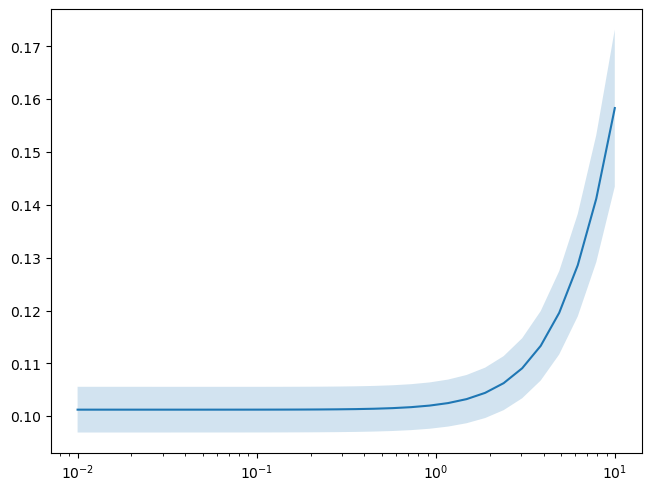

In [121]:
alpha = np.array(gs.cv_results_["param_alpha"],dtype="float64")
score = -gs.cv_results_["mean_test_score"]
score_std = gs.cv_results_["std_test_score"]
n_folds = gs.cv.get_n_splits()

plt.figure(layout="constrained")

ax = sns.lineplot(x=alpha, y=score)
ax.set_xscale("log")

plt.fill_between(
  x = alpha,
  y1 = score + 1.96*score_std / np.sqrt(n_folds),
  y2 = score - 1.96*score_std / np.sqrt(n_folds),
  alpha = 0.2
)

plt.show()

### Ridge traceplot

In [122]:
alpha = np.logspace(-2,3, 100)
betas = []

for a in alpha:
    rg = Ridge(alpha=a).fit(X, y)
    
    betas.append(rg.coef_)

res = pd.DataFrame(
  data = betas, columns = rg.feature_names_in_
).assign(
  alpha = alpha  
)

res

,x1,x2,x3,x4,x5_A,x5_B,x5_C,x5_D,alpha
0,0.995032,2.007574,0.002317,-3.000828,0.165900,-0.225440,-0.621467,0.681007,0.010000
1,0.995030,2.007568,0.002317,-3.000821,0.165903,-0.225435,-0.621458,0.680990,0.011233
2,0.995027,2.007562,0.002317,-3.000813,0.165905,-0.225428,-0.621448,0.680971,0.012619
3,0.995024,2.007555,0.002317,-3.000804,0.165909,-0.225421,-0.621437,0.680949,0.014175
4,0.995021,2.007547,0.002317,-3.000794,0.165912,-0.225413,-0.621424,0.680925,0.015923
...,...,...,...,...,...,...,...,...,...
95,0.464132,0.796323,0.025934,-1.347516,0.046700,-0.022499,-0.101339,0.077138,628.029144
96,0.435572,0.740631,0.025662,-1.261824,0.042058,-0.020376,-0.092306,0.070625,705.480231
97,0.407421,0.686644,0.025218,-1.177716,0.037789,-0.018419,-0.083926,0.064556,792.482898
98,0.379853,0.634638,0.024615,-1.095694,0.033883,-0.016620,-0.076176,0.058912,890.215085


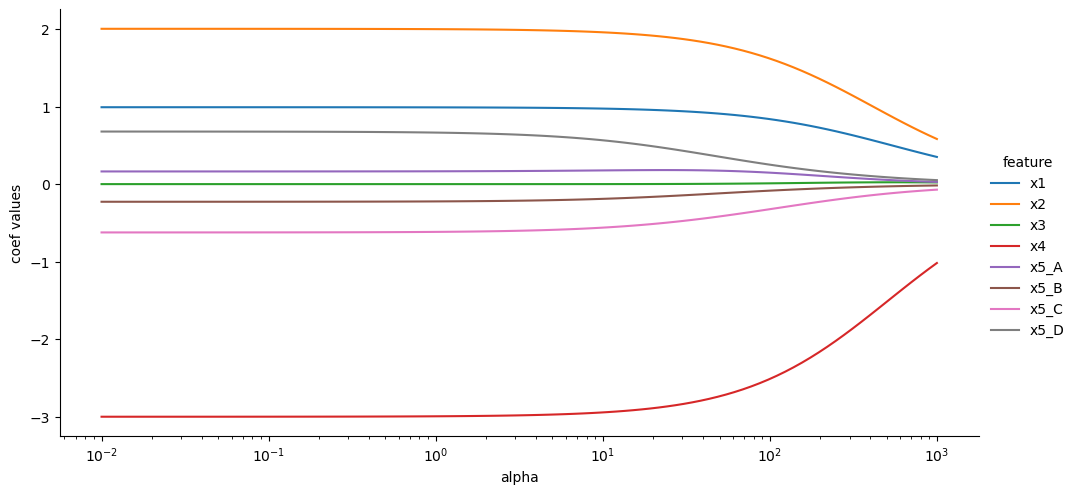

In [123]:
g = sns.relplot(
  data = res.melt(id_vars="alpha", value_name="coef values", var_name="feature"),
  x = "alpha", y = "coef values", hue = "feature",
  kind = "line", aspect=2
)
g.set(xscale="log")